<a href="https://colab.research.google.com/github/hasaninevitable/CODSOFT/blob/main/MOVIE_RATING_PREDICTION_WITH_PYTHON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mount Google Drive to access the dataset
from google.colab import drive
drive.mount('/content/drive')

# Importng necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# For model evaluation
from sklearn.model_selection import cross_val_score


Mounted at /content/drive


In [6]:
# Define the path to the dataset
dataset_path = '/content/drive/My Drive/dataset/imbdmoviesind.csv'

# Load the dataset with specified encoding
df = pd.read_csv(dataset_path, encoding='latin1')

# Display the first few rows of the dataframe
df.head()


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


EDA before any updation

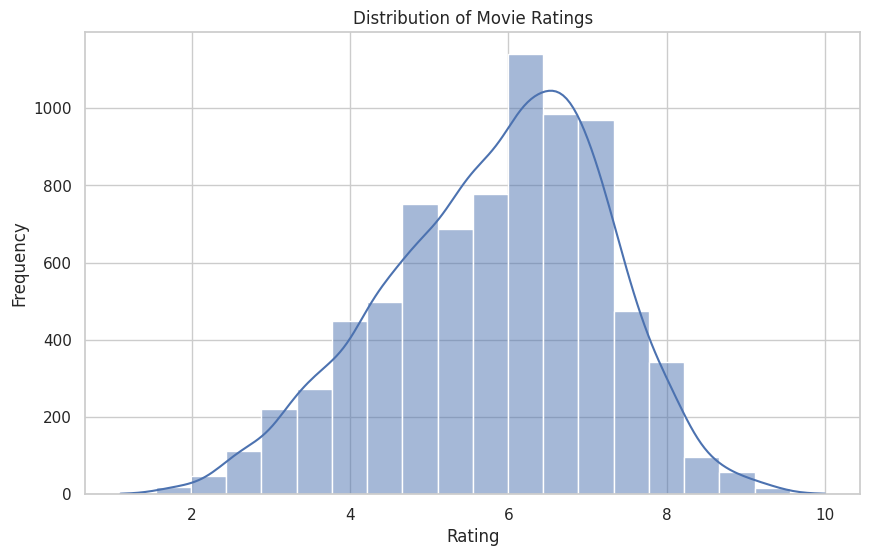

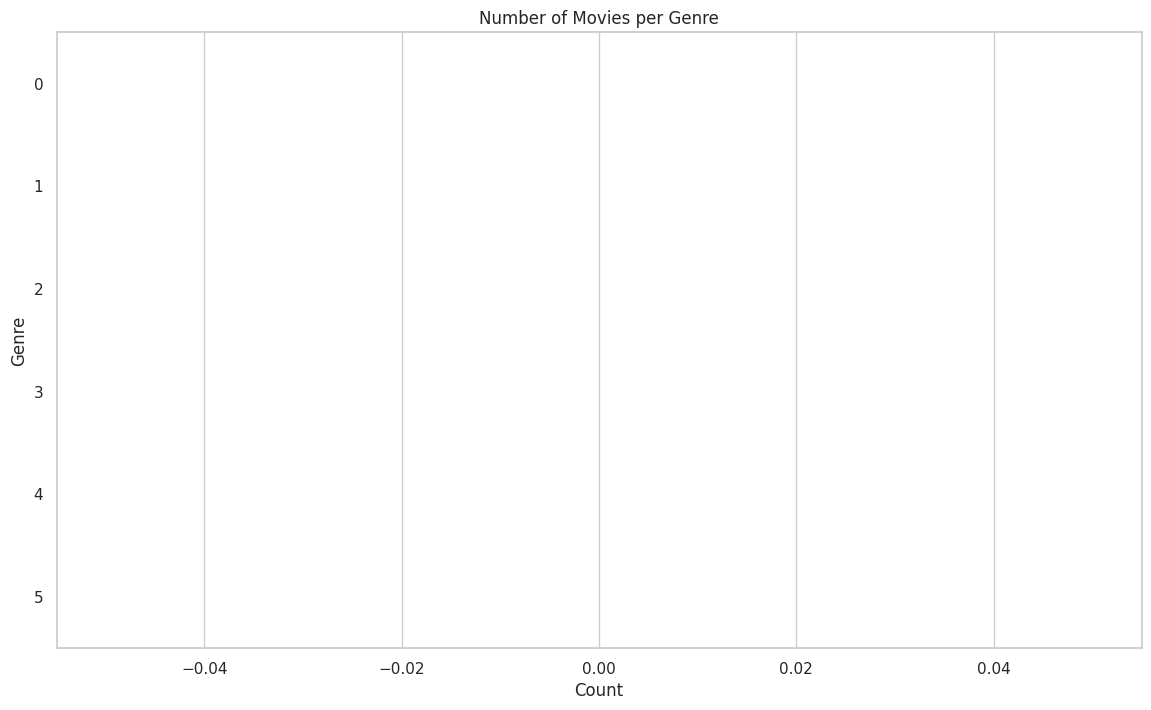

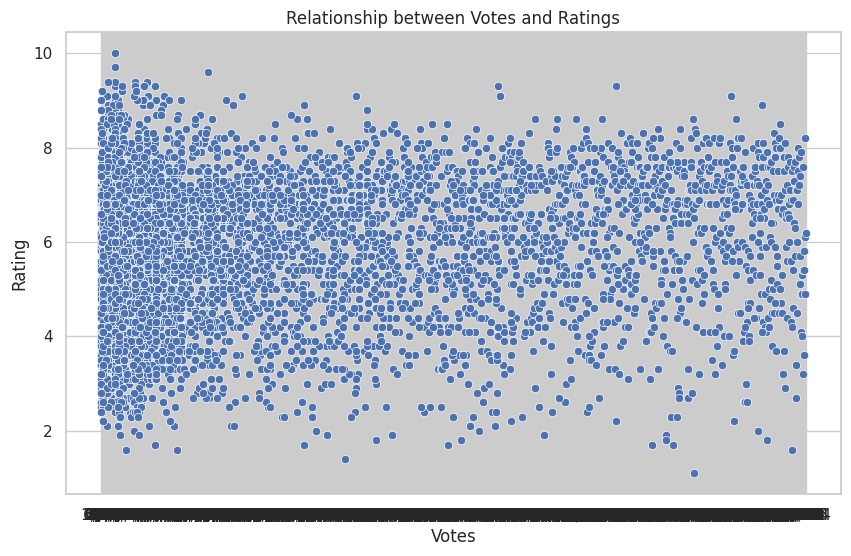

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

# Plotting the distribution of movie ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'].dropna(), bins=20, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Plotting the number of movies per genre
# Splitting the genres as there might be multiple genres per movie
df['Genre'] = df['Genre'].str.split(', ')
all_genres = df.explode('Genre')

# Remove any duplicate rows
all_genres = all_genres.drop_duplicates(subset=['Name', 'Genre'])

plt.figure(figsize=(14, 8))
sns.countplot(data=all_genres, y='Genre', order=all_genres['Genre'].value_counts().index)
plt.title('Number of Movies per Genre')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

# Plotting the relationship between votes and ratings
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Votes', y='Rating')
plt.title('Relationship between Votes and Ratings')
plt.xlabel('Votes')
plt.ylabel('Rating')
plt.show()


In [10]:
# Check for missing values
df.isnull().sum()

# Display basic information about the dataset
df.info()

# Display basic statistics of the dataset
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     0 non-null      float64
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.2+ MB


,Genre,Rating
count,0.0,7919.000000
mean,NaN,5.841621
std,NaN,1.381777
min,NaN,1.100000
25%,NaN,4.900000
50%,NaN,6.000000
75%,NaN,6.800000
max,NaN,10.000000


preprocessing aswell as visualization after updation

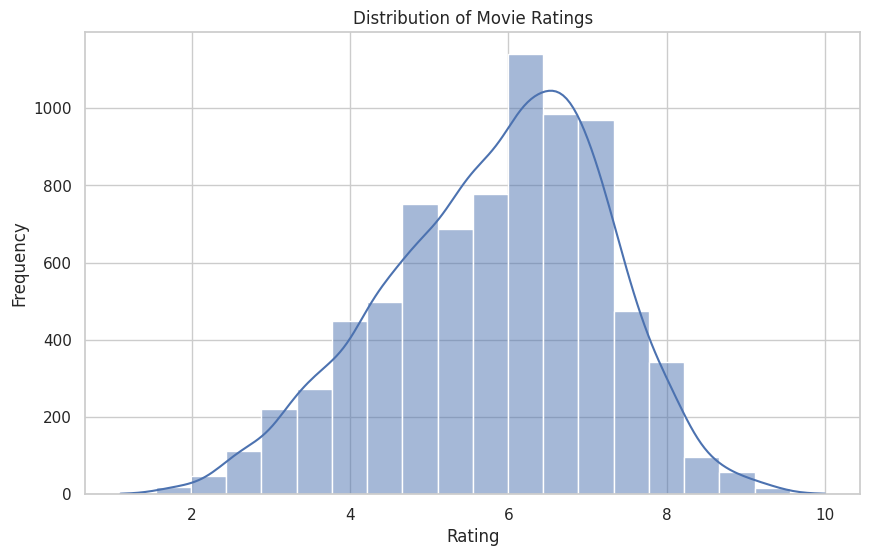

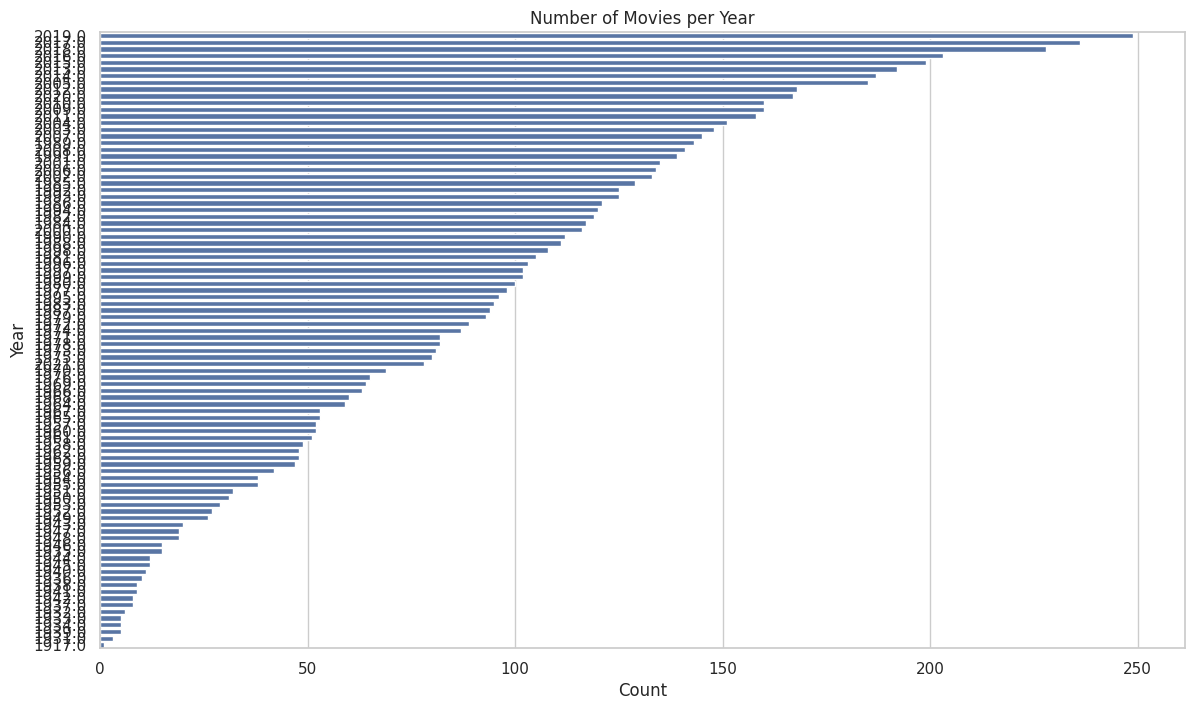

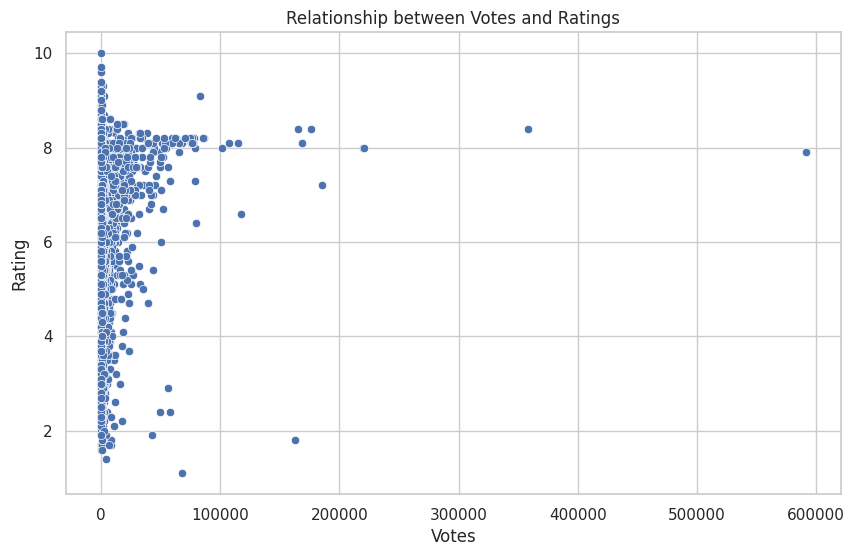

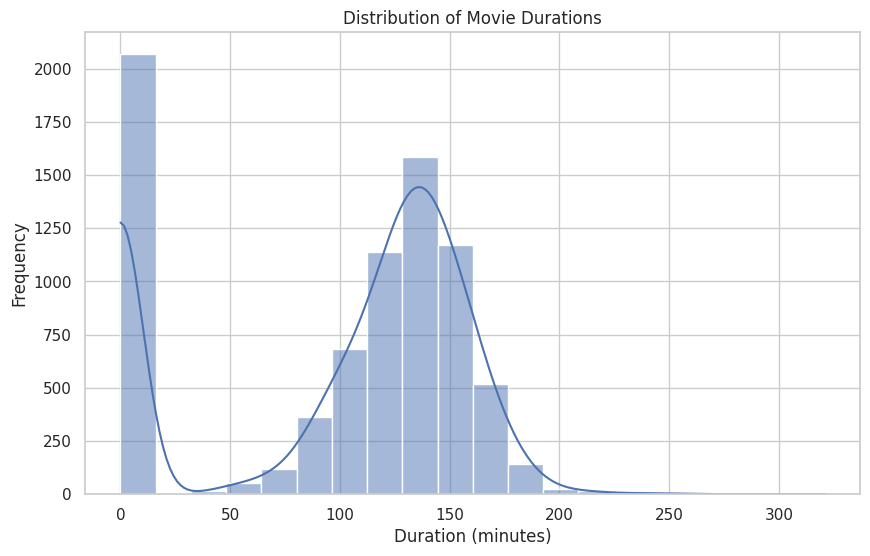

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

# Drop the 'Genre' column as it contains no useful data
df = df.drop(columns=['Genre'])

# Drop rows where 'Rating' is NaN since we can't use them in the rating prediction
df = df.dropna(subset=['Rating'])

# Convert 'Year' to a numeric type, extracting the year from the string
df['Year'] = df['Year'].str.extract(r'(\d{4})').astype(float)

# Convert 'Duration' to numeric type by extracting the number of minutes
df['Duration'] = df['Duration'].str.extract(r'(\d+)').astype(float)

# Convert 'Votes' to numeric type
df['Votes'] = df['Votes'].replace(',', '', regex=True).astype(float)

# Fill missing values in other columns by filling with 'Unknown' for categorical and 0 for numerical
df = df.fillna({'Duration': 0, 'Votes': 0, 'Director': 'Unknown', 'Actor 1': 'Unknown', 'Actor 2': 'Unknown', 'Actor 3': 'Unknown'})

# Plotting the distribution of movie ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Plotting the number of movies per year
plt.figure(figsize=(14, 8))
sns.countplot(data=df, y='Year', order=df['Year'].value_counts().index)
plt.title('Number of Movies per Year')
plt.xlabel('Count')
plt.ylabel('Year')
plt.show()

# Plotting the relationship between votes and ratings
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Votes', y='Rating')
plt.title('Relationship between Votes and Ratings')
plt.xlabel('Votes')
plt.ylabel('Rating')
plt.show()

# Plotting the distribution of movie durations
plt.figure(figsize=(10, 6))
sns.histplot(df['Duration'], bins=20, kde=True)
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()


The DataFrame has been successfully cleaned and now has no missing values. All columns have the appropriate data types for further analysis and modeling.

In [12]:
# Check for missing values
df.isnull().sum()

# Display basic information about the dataset
df.info()

# Display basic statistics of the dataset
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 7919 entries, 1 to 15508
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7919 non-null   object 
 1   Year      7919 non-null   float64
 2   Duration  7919 non-null   float64
 3   Rating    7919 non-null   float64
 4   Votes     7919 non-null   float64
 5   Director  7919 non-null   object 
 6   Actor 1   7919 non-null   object 
 7   Actor 2   7919 non-null   object 
 8   Actor 3   7919 non-null   object 
dtypes: float64(4), object(5)
memory usage: 618.7+ KB


,Year,Duration,Rating,Votes
count,7919.000000,7919.000000,7919.000000,7919.000000
mean,1993.321758,97.746559,5.841621,1938.520394
std,20.463770,62.437117,1.381777,11602.415952
min,1917.000000,0.000000,1.100000,5.000000
25%,1979.500000,0.000000,4.900000,16.000000
50%,1997.000000,122.000000,6.000000,55.000000
75%,2011.000000,143.000000,6.800000,404.000000
max,2021.000000,321.000000,10.000000,591417.000000


feature engineering

In [13]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Define the features and target variable
X = df.drop(columns=['Rating'])
y = df['Rating']

# List of numerical and categorical features
numerical_features = ['Year', 'Duration', 'Votes']
categorical_features = ['Name', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']

# Preprocessing for numerical data: scaling
numerical_transformer = StandardScaler()

# Preprocessing for categorical data: one-hot encoding
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)


(6335, 8) (1584, 8)


Model selection and performence

In [18]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV

# Define the Ridge regression model
model_ridge = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])

# Define the parameter grid for Ridge regression
param_grid = {
    'regressor__alpha': [0.1, 1.0, 10.0, 100.0]
}

# Instantiate the grid search
grid_search_ridge = GridSearchCV(model_ridge, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search
grid_search_ridge.fit(X_train, y_train)

# Best parameters and best score
print(f'Best parameters: {grid_search_ridge.best_params_}')
print(f'Best cross-validation score: {-grid_search_ridge.best_score_}')

# Evaluate the best model on the test set
best_model_ridge = grid_search_ridge.best_estimator_
y_pred_test_ridge = best_model_ridge.predict(X_test)
test_mse_ridge = mean_squared_error(y_test, y_pred_test_ridge)
test_r2_ridge = r2_score(y_test, y_pred_test_ridge)

print(f'Testing MSE (Ridge Model): {test_mse_ridge}')
print(f'Testing R^2 (Ridge Model): {test_r2_ridge}')


Best parameters: {'regressor__alpha': 10.0}
Best cross-validation score: 1.5415785104376314
Testing MSE (Ridge Model): 1.4150919914131144
Testing R^2 (Ridge Model): 0.2388480272583524


visualizing result

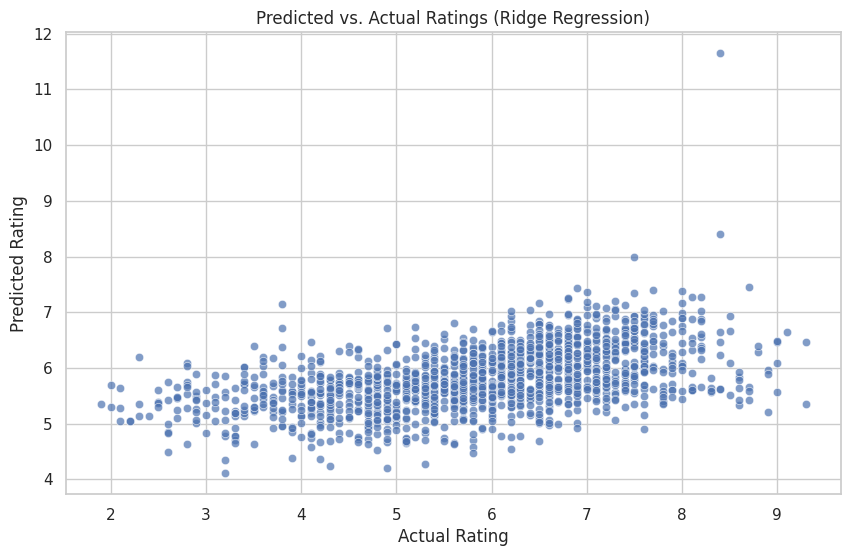

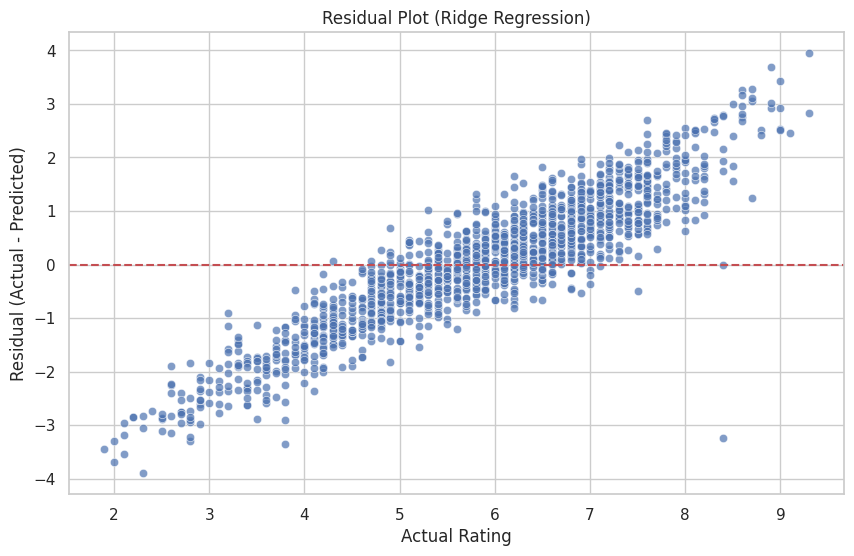

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of predicted vs. actual ratings
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_test_ridge, alpha=0.7)
plt.title('Predicted vs. Actual Ratings (Ridge Regression)')
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.show()

# Residual plot
residuals = y_test - y_pred_test_ridge
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=residuals, alpha=0.7)
plt.title('Residual Plot (Ridge Regression)')
plt.xlabel('Actual Rating')
plt.ylabel('Residual (Actual - Predicted)')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()
